In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
os.chdir(r'D:\DATA\Data Sets')

df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.shape

(10000, 3)

### (1) Outlier detection and removal using Standard Deviation

In [7]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<AxesSubplot:xlabel='Weight', ylabel='Count'>

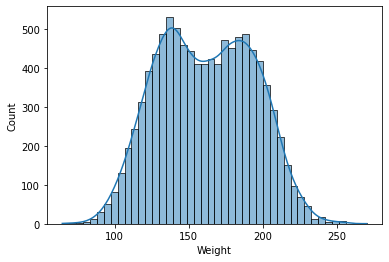

In [8]:
sns.histplot(df.Weight, kde=True)

In [9]:
mean = df['Weight'].mean()
mean

161.44035683283076

In [10]:
std_deviation = df['Weight'].std()
std_deviation

32.108439006519596

In [11]:
mean-3*std_deviation

65.11503981327198

In [12]:
mean+3*std_deviation

257.76567385238957

In [13]:
df_no_outlier = df[(df.Weight<257.76567) & (df.Weight>65.1150)]
df_no_outlier.shape

(9998, 3)

In [14]:
df_outlier = df[(df.Weight>257.76567) | (df.Weight<65.1150)]
df_outlier

,Gender,Height,Weight
2014,Male,78.998742,269.989699
9285,Female,54.263133,64.700127


### (2) Outlier detection and removal using Z Score

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

In [15]:
df['z-score'] = (df.Weight-df.Weight.mean()) / df.Weight.std()

In [16]:
df.head()

,Gender,Height,Weight,z-score
0,Male,73.847017,241.893563,2.505672
1,Male,68.781904,162.310473,0.027099
2,Male,74.110105,212.740856,1.597726
3,Male,71.730978,220.042470,1.825131
4,Male,69.881796,206.349801,1.398680


Above for first record with weight 241.893563, z score is 2.505672. This means 241.893563 is 2.505672 standard deviation away from mean

In [17]:
df.Weight.mean()

161.44035683283076

In [18]:
df.Weight.std()

32.108439006519596

In [19]:
# Example: For 1st row the z-score can be calculated like this: (value-mean)/std_deviation

(241.893563-df.Weight.mean())/df.Weight.std()

2.5056716756250053

In [20]:
df_outliers = df[(df['z-score']>3) | (df['z-score']<-3)]
df_outliers

,Gender,Height,Weight,z-score
2014,Male,78.998742,269.989699,3.380711
9285,Female,54.263133,64.700127,-3.012922
